In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Useful sklearn imports
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

# Poisson regression

## Data loading and exploration

In [2]:
def real_data_poisson():
    # Load the species data
    try:
        especies = pd.read_csv(
            'especies.txt',
            sep="\t"
        )
    except Exception as e:
        print(f"Error loading Expecies dataset: {e}.")

    # Features
    X_especies = especies.drop('Especies', axis=1)
    # Target variable
    y_especies = especies['Especies']

    return X_especies, y_especies

### Get real data for poisson regression

In [3]:
X, y = real_data_poisson()

### Explore the data, visualizing it, etc.

In [4]:
# What type of data do we have?
print('X data types:')
print(X.dtypes)
print('\n')
print('y data types:')
print(y.dtypes)

X data types:
pH           int64
Biomasa    float64
dtype: object


y data types:
int64


In [5]:
X.head()

,pH,Biomasa
0,2,0.469297
1,2,1.730870
2,2,2.089778
3,2,3.925787
4,2,4.366793


### Plot the data

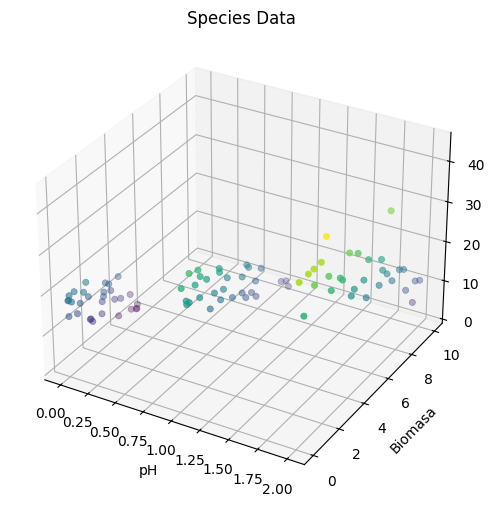

In [6]:
# 3d plot, with X features as x and y, and y as z
# We will be using matplotlib's 3d plotting capabilities
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter(X['pH'], X['Biomasa'], y, c=y, cmap='viridis', linewidth=0.5)
ax.set_xlabel('pH')
ax.set_ylabel('Biomasa')
ax.set_zlabel('Especies')
plt.title('Species Data')
plt.show()

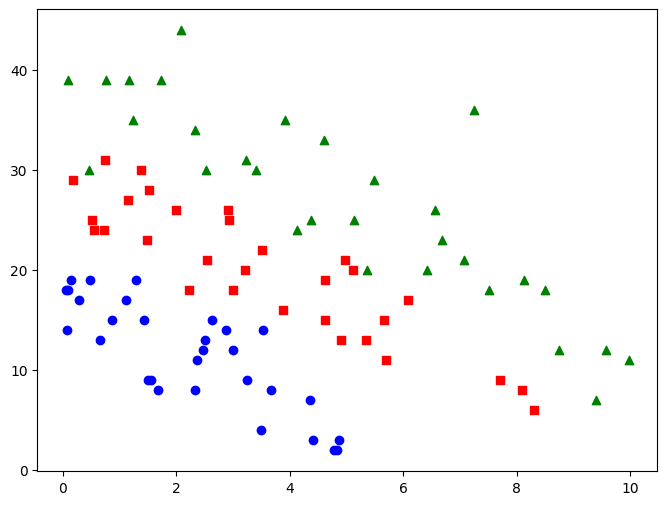

In [7]:
# Per-PH value plot
plt.figure(figsize=(8,6))
colors = {0: 'blue', 1: 'red', 2: 'green'}
markers = {0: 'o', 1: 's', 2: '^'}
# Select the subset of the data for each pH value
for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]
    plt.scatter(
        x_subset,
        y_subset,
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )

## Fitting Poisson Regression models

### Fit linear regression models, per pH value

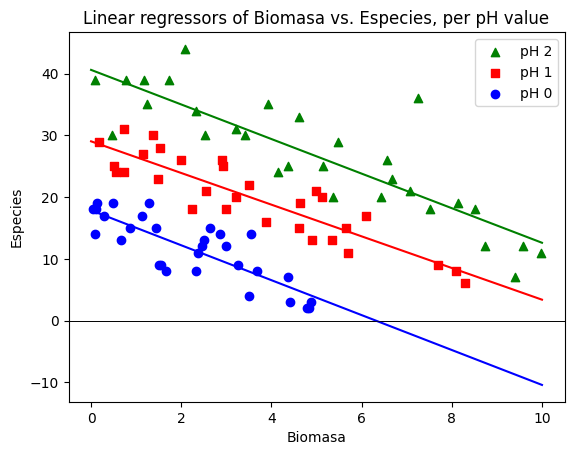

In [8]:
# We  keep track of the models, to plot them later
linear_1d_models = {}

for ph_value in X['pH'].unique():
    # Subset the data
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]

    # Define the Linear Regression model, for this ph value
    model = LinearRegression()
    # Fit the model
    model.fit(x_subset.values.reshape(-1, 1), y_subset)
    # Save the model
    linear_1d_models[ph_value] = model

    # Predict the values
    x_vals = np.linspace(0, 10, 100).reshape(-1, 1)
    y_vals = model.predict(x_vals)
    # Plot the line
    plt.plot(x_vals, y_vals, color=colors[ph_value])
    # As well as the original data
    plt.scatter(
        x_subset,
        y_subset,
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )
    # Plot a line in the origin
    plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("Biomasa")
plt.ylabel("Especies")
plt.legend()
plt.title("Linear regressors of Biomasa vs. Especies, per pH value")
plt.show()

### Fit Poisson regression models, per pH value

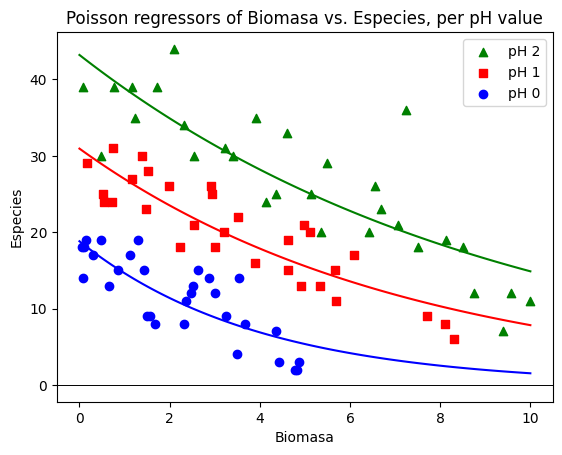

In [9]:
# We  keep track of the models, to plot them later
poisson_1d_models = {}

for ph_value in X['pH'].unique():
    # Subset the data
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]

    # Define the Poisson Regression model
    model = PoissonRegressor()
    # Fit the model
    model.fit(x_subset.values.reshape(-1, 1), y_subset)
    # Save the model
    poisson_1d_models[ph_value] = model
    
    # Predict the values
    x_vals = np.linspace(0, 10, 100).reshape(-1, 1)
    y_vals = model.predict(x_vals)
    # Plot the line
    plt.plot(x_vals, y_vals, color=colors[ph_value])
    # As well as the original data
    plt.scatter(
        x_subset,
        y_subset,
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )
    # Plot a line in the origin
    plt.axhline(0, color='black', linewidth=0.5)

plt.xlabel("Biomasa")
plt.ylabel("Especies")
plt.legend()
plt.title("Poisson regressors of Biomasa vs. Especies, per pH value")
plt.show()

### Fit a single Poisson regression model

In [10]:
# Train a Poisson Regression model over all features
poisson_full_model = PoissonRegressor()
poisson_full_model.fit(X, y)


PoissonRegressor()

### Evaluation of models

In [11]:
# Evaluate the Full model
print("\n--- Poisson Regression ---")
y_pred_poisson = poisson_full_model.predict(X)

print("Mean Absolute Error:", mean_absolute_error(y, y_pred_poisson))
print("Mean Squared Error:", mean_squared_error(y, y_pred_poisson))
print("R-squared:", r2_score(y, y_pred_poisson))


--- Poisson Regression ---
Mean Absolute Error: 3.381905499820748
Mean Squared Error: 19.221367234984562
R-squared: 0.7925334371777762


/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(


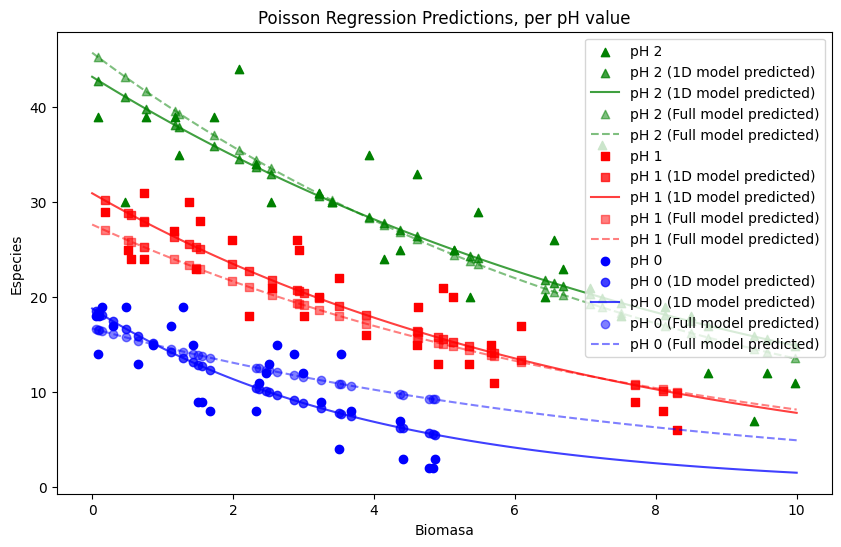

In [12]:
# Plot the original data, the predictions of each of the 1d Poisson models, and the full Poisson model, per pH value
plt.figure(figsize=(10, 6))
for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]

    # Using viridis color map
    # plt.scatter(x_subset, y_subset, c=y_subset, cmap='viridis', linewidth=0.5)
    # plt.scatter(x_subset, y_pred_subset, c=y_pred_subset, cmap='viridis', linewidth=0.5, marker='x')
    
    x_vals = np.linspace(0, 10, 100).reshape(-1, 1)
    # Using ph_value as color
    # Truth
    plt.scatter(
        x_subset, y_subset,
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )
    # 1D model
    plt.scatter(
        x_subset,
        poisson_1d_models[ph_value].predict(x_subset.values.reshape(-1, 1)),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )
    plt.plot(
        x_vals,
        poisson_1d_models[ph_value].predict(x_vals),
        color=colors[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )

    # Full model
    X_subset = X.loc[x_subset.index]
    plt.scatter(
        x_subset,
        poisson_full_model.predict(X_subset),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
    plt.plot(
        x_vals,
        poisson_full_model.predict(
            np.concatenate(
                (np.full((x_vals.shape[0], 1), ph_value), x_vals),
                axis=1
            )
        ),
        color=colors[ph_value],
        # Different line style
        linestyle='--',
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
plt.legend()
plt.xlabel('Biomasa')
plt.ylabel('Especies')
plt.title('Poisson Regression Predictions, per pH value')
plt.show()

/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(


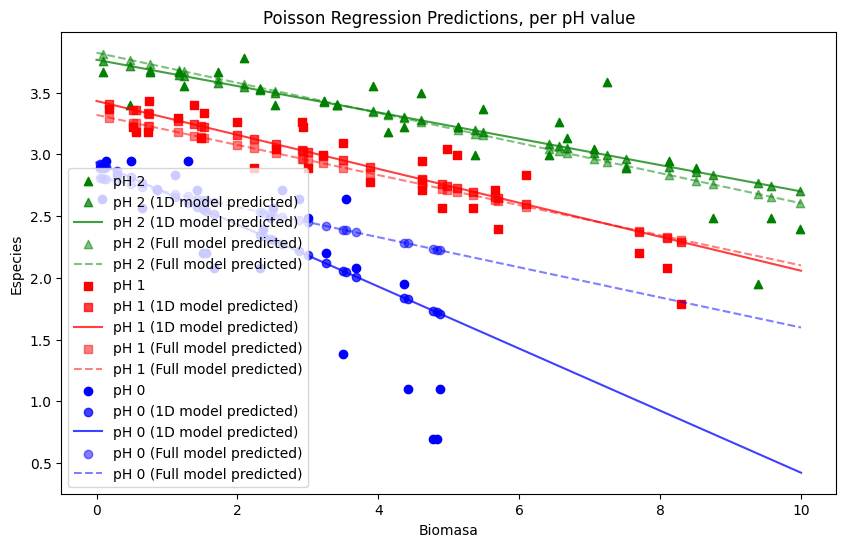

In [13]:
# Replicate the above plot in log space:
# Plot the original log-data, the predictions of each of the 1d Poisson models (in log-space), and the full Poisson model predictions in log-space
plt.figure(figsize=(10, 6))
for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]

    # Using viridis color map
    # plt.scatter(x_subset, y_subset, c=y_subset, cmap='viridis', linewidth=0.5)
    # plt.scatter(x_subset, y_pred_subset, c=y_pred_subset, cmap='viridis', linewidth=0.5, marker='x')
    
    x_vals = np.linspace(0, 10, 100).reshape(-1, 1)
    # Using ph_value as color
    # Truth
    plt.scatter(
        x_subset, np.log(y_subset),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )
    # 1D model
    plt.scatter(
        x_subset,
        np.log(
            poisson_1d_models[ph_value].predict(x_subset.values.reshape(-1, 1))
        ),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )
    plt.plot(
        x_vals,
        np.log(
            poisson_1d_models[ph_value].predict(x_vals)
        ),
        color=colors[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )

    # Full model
    X_subset = X.loc[x_subset.index]
    plt.scatter(
        x_subset,
        np.log(
            poisson_full_model.predict(X_subset)
        ),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
    plt.plot(
        x_vals,
        np.log(
            poisson_full_model.predict(
                np.concatenate(
                    (np.full((x_vals.shape[0], 1), ph_value), x_vals),
                    axis=1
                )
            )
        ),
        color=colors[ph_value],
        # Different line style
        linestyle='--',
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
plt.legend()
plt.xlabel('Biomasa')
plt.ylabel('Especies')
plt.title('Poisson Regression Predictions, per pH value')
plt.show()

In [14]:
# Compare the 1d and full poisson regression models

# Evaluate the 1d models
mae_1d = {}
mse_1d = {}
r2_1d = {}

for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]
    y_pred_subset = poisson_1d_models[ph_value].predict(x_subset.values.reshape(-1, 1))
    mae_1d[ph_value] = mean_absolute_error(y_subset, y_pred_subset)
    mse_1d[ph_value] = mean_squared_error(y_subset, y_pred_subset)
    r2_1d[ph_value] = r2_score(y_subset, y_pred_subset)

# Evaluate the full model
y_pred_poisson = poisson_full_model.predict(X)
mae_full = mean_absolute_error(y, y_pred_poisson)
mse_full = mean_squared_error(y, y_pred_poisson)
r2_full = r2_score(y, y_pred_poisson)

# Print the results
print("\n--- Poisson Regression ---")
print("\n--------------------------")
print("1D Model Results:")
print("Mean Absolute Error: {}".format(
    np.mean(list(mae_1d.values())))
)
for ph_value, mae in mae_1d.items():
    print(f"\tpH {ph_value}: {mae}")
print("Mean Squared Error: {}".format(
    np.mean(list(mse_1d.values())))
)
for ph_value, mse in mse_1d.items():
    print(f"\tpH {ph_value}: {mse}")
print("R-squared: {}".format(
    np.mean(list(r2_1d.values())))
)
for ph_value, r2 in r2_1d.items():
    print(f"\tpH {ph_value}: {r2}")

print("\n--------------------------")
print("Full Model Results:")
print("Mean Absolute Error:", mae_full)
print("Mean Squared Error:", mse_full)
print("R-squared:", r2_full)



--- Poisson Regression ---

--------------------------
1D Model Results:
Mean Absolute Error: 3.1071856912005718
	pH 2: 3.7664005792685384
	pH 1: 2.8738677378350266
	pH 0: 2.68128875649815
Mean Squared Error: 15.931970123868448
	pH 2: 27.422903784324863
	pH 1: 10.294689048544864
	pH 0: 10.07831753873562
R-squared: 0.6986824542241358
	pH 2: 0.6958417947612592
	pH 1: 0.7638832787030995
	pH 0: 0.6363222892080487

--------------------------
Full Model Results:
Mean Absolute Error: 3.381905499820748
Mean Squared Error: 19.221367234984562
R-squared: 0.7925334371777762


### Fit a Poisson regression model: with interaction terms

In [15]:
# Copy original X features into a new DataFrame
X_interactions = X.copy()
# Define interaction terms
X_interactions['pH*Biomasa'] = X_interactions['pH'] * X_interactions['Biomasa']

# Train a Poisson Regression model over all features
poisson_full_model_interactions = PoissonRegressor()
poisson_full_model_interactions.fit(X_interactions, y)

PoissonRegressor()

/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sk

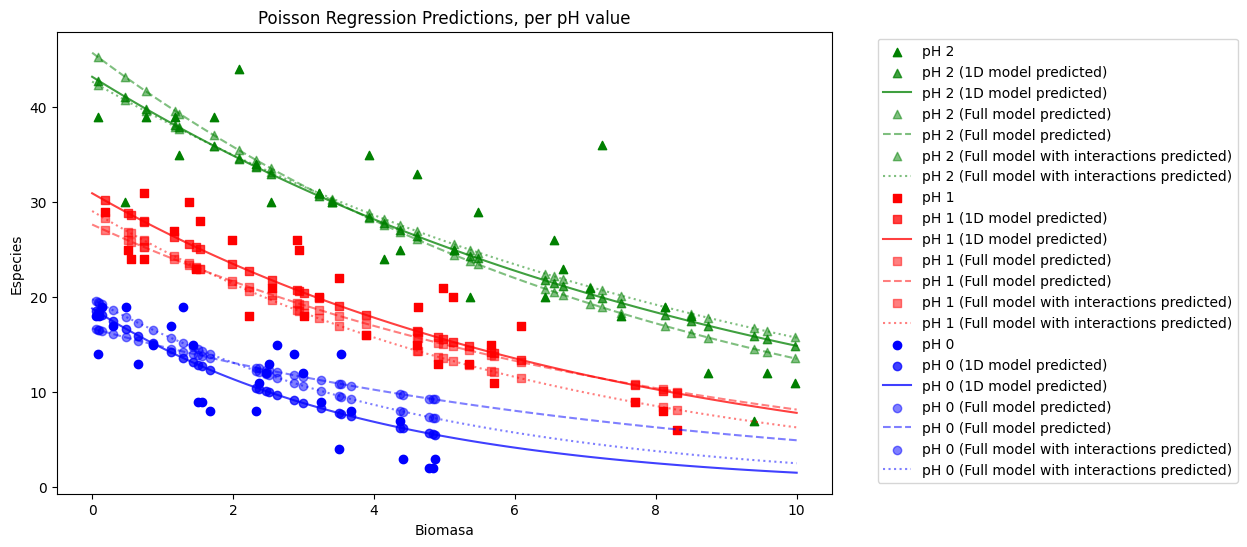

In [16]:
# Plot the original data per Ph Values along with the predictions of
# each of the 1d Poisson models,
# the full Poisson model
# and the full Poisson model with interactions
plt.figure(figsize=(10, 6))
for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]
    
    x_vals = np.linspace(0, 10, 100).reshape(-1, 1)
    # Using ph_value as color
    # Truth
    plt.scatter(
        x_subset, y_subset,
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )
    # 1D model
    plt.scatter(
        x_subset,
        poisson_1d_models[ph_value].predict(x_subset.values.reshape(-1, 1)),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )
    plt.plot(
        x_vals,
        poisson_1d_models[ph_value].predict(x_vals),
        color=colors[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )

    # Full model
    X_subset = X.loc[x_subset.index]
    plt.scatter(
        x_subset,
        poisson_full_model.predict(X_subset),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
    plt.plot(
        x_vals,
        poisson_full_model.predict(
            np.concatenate(
                (np.full((x_vals.shape[0], 1), ph_value), x_vals),
                axis=1
            )
        ),
        color=colors[ph_value],
        # Different line style
        linestyle='--',
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
    # Full model with interactions
    X_interactions_subset = X_interactions.loc[x_subset.index]
    plt.scatter(
        x_subset,
        poisson_full_model_interactions.predict(X_interactions_subset),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (Full model with interactions predicted)',
        alpha=0.5
    )
    plt.plot(
        x_vals,
        poisson_full_model_interactions.predict(
            np.concatenate(
                (np.full((x_vals.shape[0], 1), ph_value), x_vals, x_vals * ph_value),
                axis=1
            )
        ),
        color=colors[ph_value],
        # Different line style
        linestyle=':',
        label=f'pH {ph_value} (Full model with interactions predicted)',
        alpha=0.5
    )
# Legend, outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Biomasa')
plt.ylabel('Especies')
plt.title('Poisson Regression Predictions, per pH value')
plt.show()

/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sk

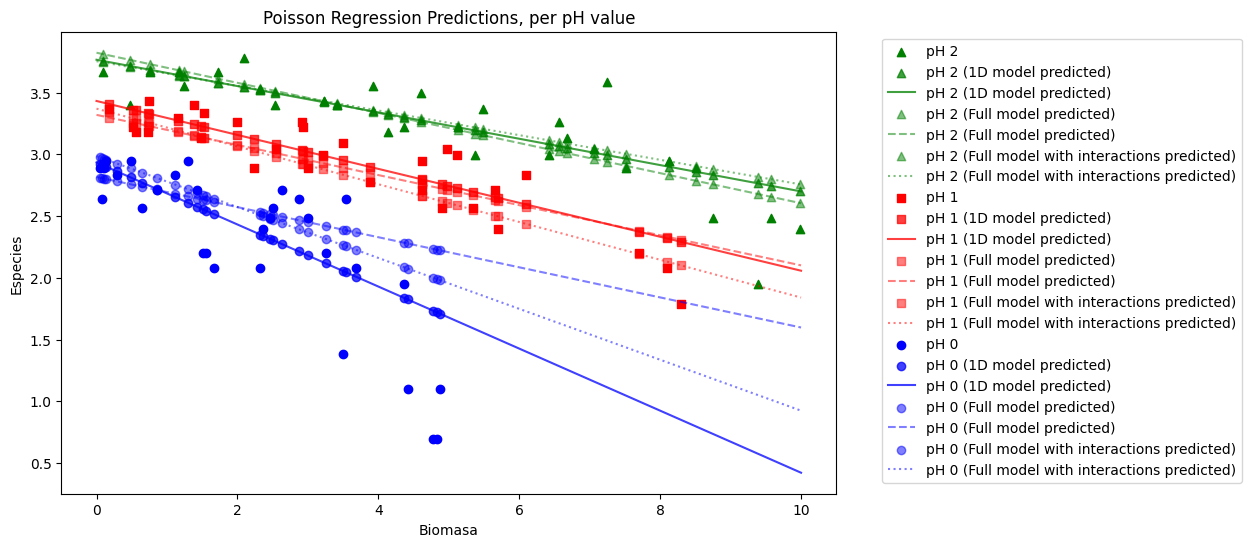

In [17]:
# Replicate the above plot in log space:

# Plot the original data per Ph Values along with the predictions of
# each of the 1d Poisson models,
# the full Poisson model
# and the full Poisson model with interactions
plt.figure(figsize=(10, 6))
for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]
    
    x_vals = np.linspace(0, 10, 100).reshape(-1, 1)
    # Using ph_value as color
    # Truth
    plt.scatter(
        x_subset,
        np.log(y_subset),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value}'
    )
    # 1D model
    plt.scatter(
        x_subset,
        np.log(
            poisson_1d_models[ph_value].predict(x_subset.values.reshape(-1, 1))
        ),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )
    plt.plot(
        x_vals,
        np.log(
            poisson_1d_models[ph_value].predict(x_vals)
        ),
        color=colors[ph_value],
        label=f'pH {ph_value} (1D model predicted)',
        alpha=0.75
    )

    # Full model
    X_subset = X.loc[x_subset.index]
    plt.scatter(
        x_subset,
        np.log(
            poisson_full_model.predict(X_subset)
        ),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
    plt.plot(
        x_vals,
        np.log(
                poisson_full_model.predict(
                np.concatenate(
                    (np.full((x_vals.shape[0], 1), ph_value), x_vals),
                    axis=1
                )
            )
        ),
        color=colors[ph_value],
        # Different line style
        linestyle='--',
        label=f'pH {ph_value} (Full model predicted)',
        alpha=0.5
    )
    # Full model with interactions
    X_interactions_subset = X_interactions.loc[x_subset.index]
    plt.scatter(
        x_subset,
        np.log(
            poisson_full_model_interactions.predict(X_interactions_subset)
        ),
        color=colors[ph_value],
        marker=markers[ph_value],
        label=f'pH {ph_value} (Full model with interactions predicted)',
        alpha=0.5
    )
    plt.plot(
        x_vals,
        np.log(
                poisson_full_model_interactions.predict(
                np.concatenate(
                    (np.full((x_vals.shape[0], 1), ph_value), x_vals, x_vals * ph_value),
                    axis=1
                )
            )
        ),
        color=colors[ph_value],
        # Different line style
        linestyle=':',
        label=f'pH {ph_value} (Full model with interactions predicted)',
        alpha=0.5
    )
# Legend, outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Biomasa')
plt.ylabel('Especies')
plt.title('Poisson Regression Predictions, per pH value')
plt.show()


In [18]:
# Compare all poisson regression models

# Evaluate the 1d models
mae_1d = {}
mse_1d = {}
r2_1d = {}

for ph_value in X['pH'].unique():
    x_subset = X[X['pH'] == ph_value]['Biomasa']
    y_subset = y.loc[x_subset.index]
    y_pred_subset = poisson_1d_models[ph_value].predict(x_subset.values.reshape(-1, 1))
    mae_1d[ph_value] = mean_absolute_error(y_subset, y_pred_subset)
    mse_1d[ph_value] = mean_squared_error(y_subset, y_pred_subset)
    r2_1d[ph_value] = r2_score(y_subset, y_pred_subset)

# Evaluate the full model
y_pred_poisson = poisson_full_model.predict(X)
mae_full = mean_absolute_error(y, y_pred_poisson)
mse_full = mean_squared_error(y, y_pred_poisson)
r2_full = r2_score(y, y_pred_poisson)

# Evaluate the full model with interactions
y_pred_poisson_interactions = poisson_full_model_interactions.predict(X_interactions)
mae_full_interactions = mean_absolute_error(y, y_pred_poisson_interactions)
mse_full_interactions = mean_squared_error(y, y_pred_poisson_interactions)
r2_full_interactions = r2_score(y, y_pred_poisson_interactions)

# Print the results
print("\n--- Poisson Regression ---")
print("\n--------------------------")
print("1D Model Results:")
print("Mean Absolute Error: {}".format(
    np.mean(list(mae_1d.values())))
)
for ph_value, mae in mae_1d.items():
    print(f"\tpH {ph_value}: {mae}")
print("Mean Squared Error: {}".format(
    np.mean(list(mse_1d.values())))
)
for ph_value, mse in mse_1d.items():
    print(f"\tpH {ph_value}: {mse}")
print("R-squared: {}".format(
    np.mean(list(r2_1d.values())))
)
for ph_value, r2 in r2_1d.items():
    print(f"\tpH {ph_value}: {r2}")

print("\n--------------------------")
print("Full Model Results:")
print("Mean Absolute Error:", mae_full)
print("Mean Squared Error:", mse_full)
print("R-squared:", r2_full)

print("\n--------------------------")
print("Full Model with interactions Results:")
print("Mean Absolute Error:", mae_full_interactions)
print("Mean Squared Error:", mse_full_interactions)
print("R-squared:", r2_full_interactions)


--- Poisson Regression ---

--------------------------
1D Model Results:
Mean Absolute Error: 3.1071856912005718
	pH 2: 3.7664005792685384
	pH 1: 2.8738677378350266
	pH 0: 2.68128875649815
Mean Squared Error: 15.931970123868448
	pH 2: 27.422903784324863
	pH 1: 10.294689048544864
	pH 0: 10.07831753873562
R-squared: 0.6986824542241358
	pH 2: 0.6958417947612592
	pH 1: 0.7638832787030995
	pH 0: 0.6363222892080487

--------------------------
Full Model Results:
Mean Absolute Error: 3.381905499820748
Mean Squared Error: 19.221367234984562
R-squared: 0.7925334371777762

--------------------------
Full Model with interactions Results:
Mean Absolute Error: 3.223947356440372
Mean Squared Error: 18.050868037787826
R-squared: 0.805167265055878
